In [50]:
import pandas as pd

In [51]:
#Time series is a set of data points indexed in time order

In [52]:
df = pd.read_csv('HistoricalQuotes.csv',parse_dates=['Date'],index_col='Date')

In [53]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-02-28,$273.36,106721200,$257.26,$278.41,$256.37
2020-02-27,$273.52,80151380,$281.1,$286,$272.96
2020-02-26,$292.65,49678430,$286.53,$297.88,$286.5
2020-02-25,$288.08,57668360,$300.95,$302.53,$286.13
2020-02-24,$298.18,55548830,$297.26,$304.18,$289.23


In [54]:
df.dtypes

 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object

In [55]:
df.columns = df.columns.str.strip()

In [56]:
def preprocess(text):
     text = str(text)
    
    # Remove non-numeric characters, except for the decimal point
     cleaned_text = ''.join(char for char in text if char.isdigit() or char == '.')

     try:
         result = float(cleaned_text)
     except ValueError:
        # Handle the case where the string contains non-numeric characters
        result = None
    
     return result


In [57]:
preprocess('$123')

123.0

In [58]:
df['close'] = df['Close/Last'].apply(lambda x:preprocess(x))

In [59]:
df.head()

,Close/Last,Volume,Open,High,Low,close
Date,,,,,,
2020-02-28,$273.36,106721200,$257.26,$278.41,$256.37,273.36
2020-02-27,$273.52,80151380,$281.1,$286,$272.96,273.52
2020-02-26,$292.65,49678430,$286.53,$297.88,$286.5,292.65
2020-02-25,$288.08,57668360,$300.95,$302.53,$286.13,288.08
2020-02-24,$298.18,55548830,$297.26,$304.18,$289.23,298.18


In [60]:
df.columns = df.columns.str.strip()

In [61]:
df['open'] = df['Open'].apply(lambda x:preprocess(x))

In [62]:
df['high'] = df['High'].apply(lambda x:preprocess(x))

In [63]:
df['low'] = df['Low'].apply(lambda x:preprocess(x))

In [64]:
df.drop(['Close/Last','Open','High'],inplace=True,axis=1)

In [65]:
df.head()


,Volume,Low,close,open,high,low
Date,,,,,,
2020-02-28,106721200,$256.37,273.36,257.26,278.41,256.37
2020-02-27,80151380,$272.96,273.52,281.10,286.00,272.96
2020-02-26,49678430,$286.5,292.65,286.53,297.88,286.50
2020-02-25,57668360,$286.13,288.08,300.95,302.53,286.13
2020-02-24,55548830,$289.23,298.18,297.26,304.18,289.23


In [66]:
df.drop(['Low'],inplace=True,axis=1)

In [67]:
df.head()

,Volume,close,open,high,low
Date,,,,,
2020-02-28,106721200,273.36,257.26,278.41,256.37
2020-02-27,80151380,273.52,281.10,286.00,272.96
2020-02-26,49678430,292.65,286.53,297.88,286.50
2020-02-25,57668360,288.08,300.95,302.53,286.13
2020-02-24,55548830,298.18,297.26,304.18,289.23


In [78]:
df.loc['2020-02']

,Volume,close,open,high,low
Date,,,,,
2020-02-28,106721200,273.36,257.26,278.41,256.3700
2020-02-27,80151380,273.52,281.10,286.00,272.9600
2020-02-26,49678430,292.65,286.53,297.88,286.5000
2020-02-25,57668360,288.08,300.95,302.53,286.1300
2020-02-24,55548830,298.18,297.26,304.18,289.2300
2020-02-21,32426420,313.05,318.62,320.45,310.5000
2020-02-20,25141490,320.30,322.63,324.65,318.2100
2020-02-19,23495990,323.62,320.00,324.57,320.0000
2020-02-18,38190550,319.00,315.36,319.75,314.6100


In [79]:
df.loc['2020-02'].close.mean()

311.2705263157895

In [85]:
 df.loc['2020-02-03':'2020-02-10']

,Volume,close,open,high,low
Date,,,,,
2020-02-10,27337220,321.55,314.18,321.55,313.8500
2020-02-07,29421010,320.03,322.37,323.40,318.0000
2020-02-06,26356390,325.21,322.57,325.22,320.2648
2020-02-05,29706720,321.45,323.52,324.76,318.9500
2020-02-04,34154130,318.85,315.31,319.64,313.6345
2020-02-03,43496400,308.66,304.30,313.49,302.2200


<Axes: xlabel='Date'>

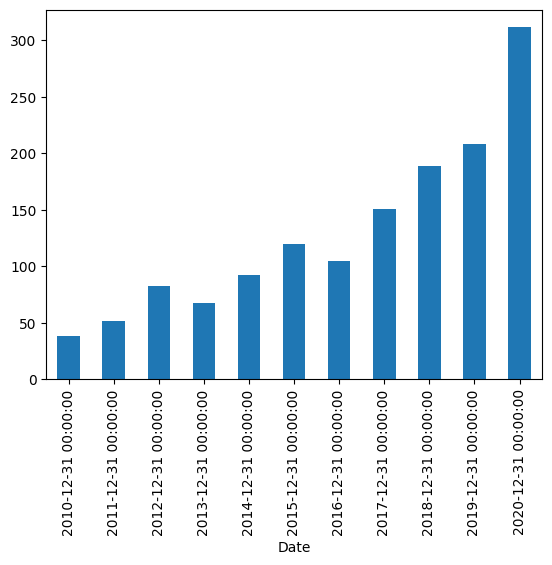

In [90]:
df.close.resample("Y").mean().plot(kind='bar')